title: "Python Final Project"


author: "Kateryna Shulikova"

# 1. **Introduction**

## Problem statement
The aim of this project is to predict whether an individual’s income will be greater than $50,000 per year or not based on census data.


## Dataset overview:
32561 observation with 15 variables. This data was extracted by Barry Becker from the 1994 Census database. (Sourse:<https://archive.ics.uci.edu/ml/datasets/Census+Income>) 


Each row describes one person with such information as sex, age, race, education, work class, occupation, marital-status, relationship, capital-gain, capital-loss, hours per week, native-country, revenue and final weight determined by census org.


#### Variables description:
We can distinguish one *response variable* “revenue” from the dataset to try to solve the problem statement. That variable is binary and indicates whether an individual makes more than $50,000 annually or not.

Other variables in our case are *predictors* :
 
* Age- age of the individual
* Race- race of the individual (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
* Workclass- class of work (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,  Local-gov, State-gov, Without-pay, Never-worked)
*  Fnlwgt- final weight determined by census org
* Education- education of the individual (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
* Education_num- id number of education
* Marital_status- marital status of the individual (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
* Occupation- occupation of the individual (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
* Relationship- present relationship (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
* Sex- sex of the individual (Female, Male)
* Capital_gain- capital gain made by the individual
* Capital_loss- capital loss made by the individual
* Hours_per_week- average number of hours spent by the individual on work
* Native_country- native country of the individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)


## Description of the method to be used

In this project I will use random forest algorithm, this is a natural extension of a decision tree. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees, that allows to buid each tree on the different set of observations.

For this project I will use sklearn.ensemble RandomForestClassifier that is available in Python.




# 2. **Installing Packages and Data preparation**

###  Loading the dataset:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

from sklearn.ensemble import RandomForestClassifier # importing Random Forest


import warnings
warnings.filterwarnings('ignore')

In [48]:
columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss',
           'hours_per_week','native_country','revenue']
df=pd.read_csv("C:/Users/kater/OneDrive/Рабочий стол/Python/Project/adult.csv", names=columns)
data = [df]

In [49]:
# loading top 5 rows from adult data set
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,revenue
0,54,Private,176681,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States,<=50K
1,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
2,18,Private,243313,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
3,60,?,24215,10th,6,Divorced,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,10,United-States,<=50K
4,66,Self-emp-not-inc,167687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1409,0,50,United-States,<=50K


### Cleaning the data

Removing missing values:


In [77]:
df.replace(" ?", np.nan, inplace = True)
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,revenue,total_capital
5,75,Private,314209,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,<=50K,0
14,41,Private,180138,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran,>50K,0
32,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K,0
42,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,75,Thailand,>50K,0
57,22,Private,34918,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,Germany,<=50K,0


In [57]:
df.dropna(inplace= True)
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,revenue,total_capital
0,54,Private,176681,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States,<=50K,0
1,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K,0
2,18,Private,243313,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K,0
4,66,Self-emp-not-inc,167687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1409,0,50,United-States,<=50K,1409
5,75,Private,314209,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,<=50K,0


From the results above, we can see that we do not have missing values in the data.

### Checking the relationship between education and education_num

In [52]:
df.drop_duplicates(['education', 'education_num'])[['education', 'education_num']]

,education,education_num
0,HS-grad,9
1,Preschool,1
3,10th,6
5,Assoc-voc,11
7,11th,7
9,Some-college,10
11,Prof-school,15
14,Bachelors,13
15,Masters,14
19,Assoc-acdm,12


From the results above it is obvious that education_num is an integer equivalent or ID number of variable education. 
Therefore, we can remove education (categorical variable) from the final model.

In [53]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
df.describe(include=[object]) 

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,revenue
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


There are some simple descriptive statistics for the variables (count, max, min, mean... for numerical variables and count, unique, top, freq for categorical ones (object type in python))
It gives some insights about the data. For example that the oldest person is 90 years old and the yougest is just 17. 

### Optimizing capital_gain and capital_loss columns 
##### Combining into 1 column - total_capital

In [58]:
df['total_capital'] = df['capital_gain']-df['capital_loss']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,revenue,total_capital
0,54,Private,176681,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States,<=50K,0
1,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K,0
2,18,Private,243313,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K,0
4,66,Self-emp-not-inc,167687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1409,0,50,United-States,<=50K,1409
5,75,Private,314209,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,<=50K,0



# 3. **Data analysis**


### General distribution of response  variable "revenue" in the dataset

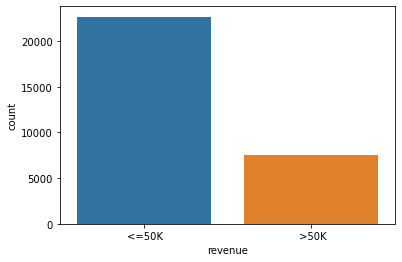

In [59]:
r = sns.countplot(x="revenue", data=df)

From the graph above we can clearly see that in this dataset more observations have level of revenue less or equal to 50 000$.


### Native country variable distribution

##### General analysis of the column:

In [60]:
df.native_country.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

From the results above we can see a lot of instances with small number of observations (1, 11, 12, 16, 17, 18...).

But for the United-States there are 27 504 observations, so in order to see the distribution of other countries and to have smaller scale we will exclude US from the graph below. 

In [61]:
df = df[df.native_country != " United-States"]

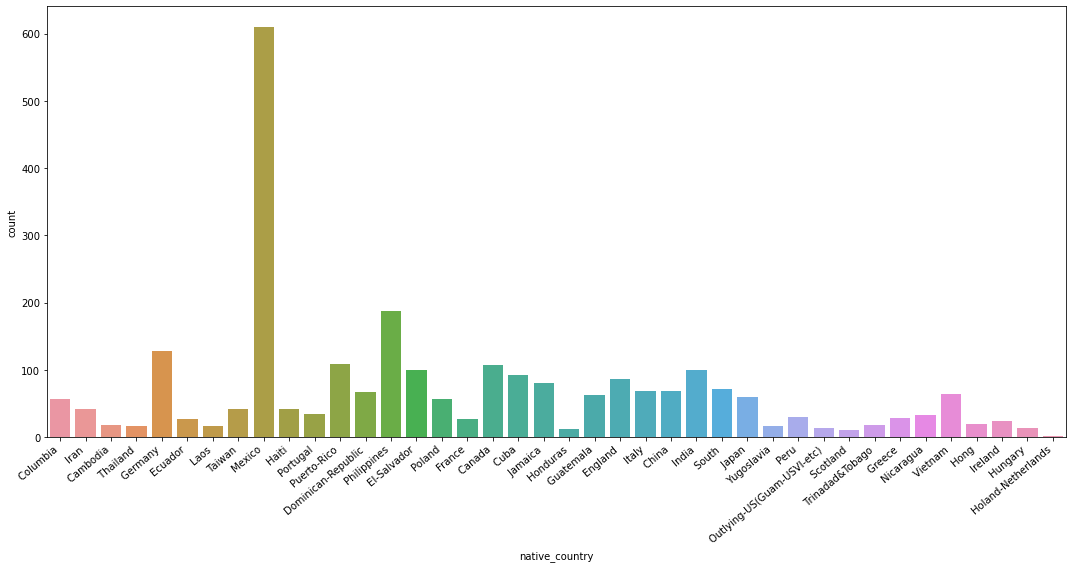

In [62]:
plt.figure(figsize=(15,8))
c = sns.countplot(df['native_country']);

c.set_xticklabels(c.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


This graph shows only frequency of the observations in the native_country column (without United States). And it is obvious that for a lot of instances Mexico is a native country.

### Sex, race, relationship and marital status variables distribution

In [63]:
data = df.groupby('sex').sum()
data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,total_capital
sex,,,,,,,
Female,32224,171150187,7744,374517,29983,31978,344534
Male,68118,408650726,16385,1744398,152647,75724,1591751


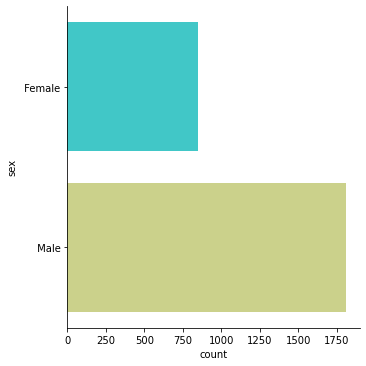

In [64]:
r = sns.catplot(y="sex", kind="count", palette="rainbow", data=df)

Diagrams above are representing distribution of each variable. We can conclude that:

* Sex - there is more than half more males than females in this data set 

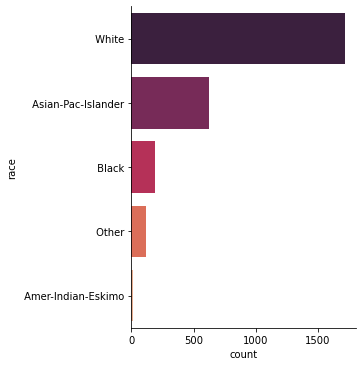

In [65]:
r = sns.catplot(y="race", kind="count", palette="rocket", data=df)

* Race - most people are representatives of white race  

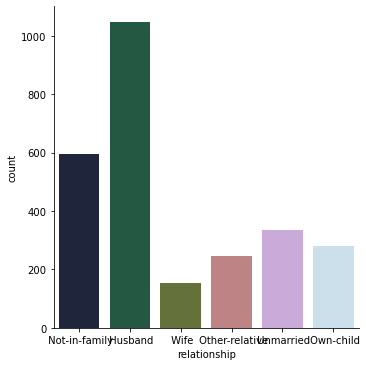

In [66]:
r = sns.catplot(x="relationship", kind="count", palette="cubehelix", data=df)

* Relationship - "husband" is the most frequent type of relationship, second one is "not in family"

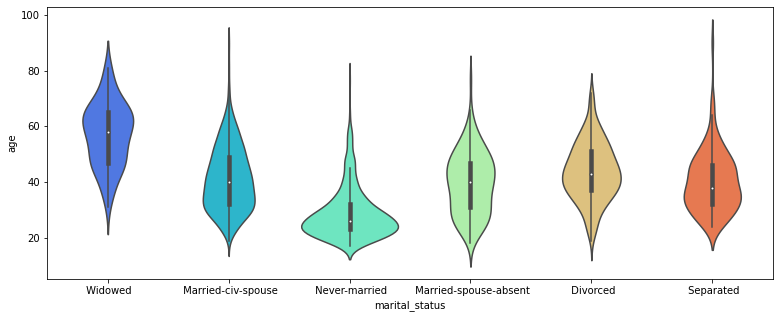

In [67]:
plt.figure(figsize=(13,5))
a = sns.violinplot(x="marital_status", y="age", data=df,palette='rainbow')

From the graph above we can see a violin plots (they are really helpful to visualize data distributions, display the range, median, and distribution of the data). For exampe we can see that:
* widowed are mostly people in age 50-70, median is around 60 years old;
* married-cis-spouse variable has some older outliers as well as other next variables;
* interesting is never-maried variable distribution, as it shows that median is around 25 years old; the most frequent group is around 20-30 and among old people there are less such observations;
* the most frequent divorse group is in the mid-thirties till about 50 years old;
* separated group of people has median in age of around 38 and outliers in around 90 years old


### Workclass and occupation variables distribution by revenue

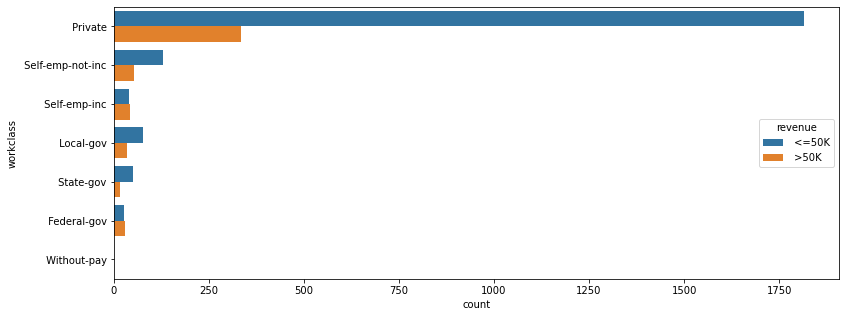

In [73]:
plt.figure(figsize=(13,5))
ax = sns.countplot(y="workclass", hue="revenue", data=df)

The graph above represents dividing revenue between different groups of people.
The most interesting instances is:

* *private* work class makes up the majority of observations and has the highest more than 50 000$ revenue result 

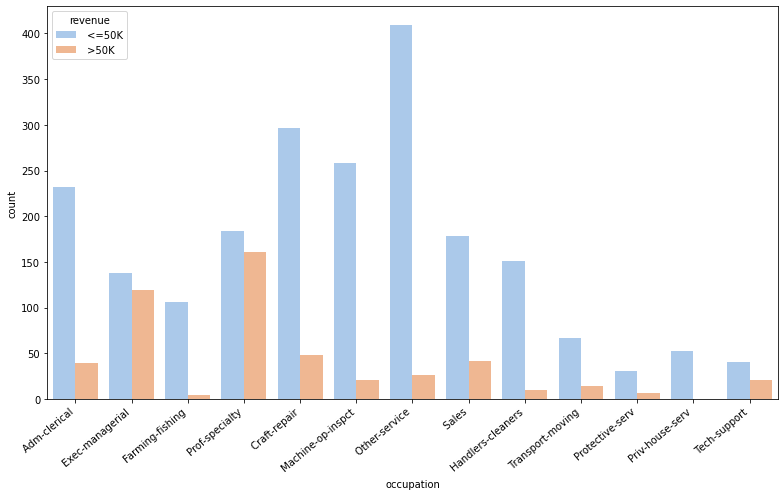

In [74]:
plt.figure(figsize=(11,7))
ax = sns.countplot(x="occupation", hue="revenue", palette="pastel", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

For occupation: 
* *Exec-managerial* and *Prof-specialty* are the leaders regarding higher revenue;

However
* *Other-service* is the most frequent group.


### Education variable distribution by revenue

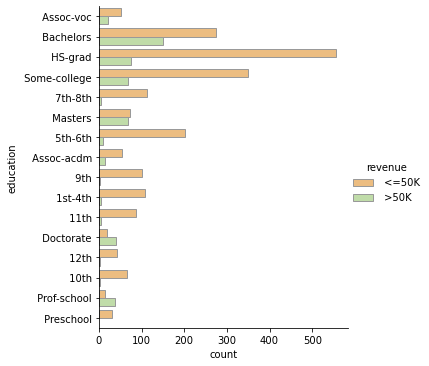

In [75]:
e = sns.catplot(y="education", hue="revenue", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df)

From the graph above, we can conclude that Bachelor stands for the highest revenue, nevertheless it is not the most frequent group.

But in general, some education influence on the level of revenue more than the other groups.

### Age variable distribution by revenue

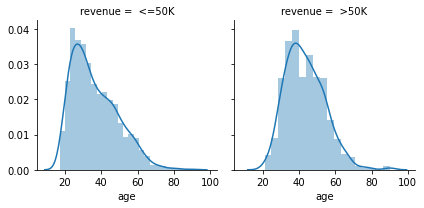

In [76]:
a = sns.FacetGrid(df, col='revenue')
a = a.map(sns.distplot, "age")

From the histogram above, we can clearly see that the total distribution of age variable in this dataset is right skewed and the highest revenue is observed for people from around mid-thirties until around 48 years old.


### Hours per week variable distribution 

##### General overview:

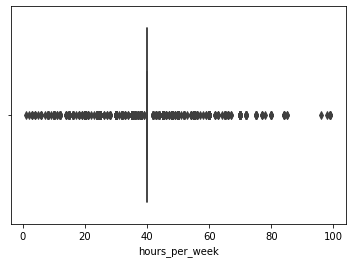

In [78]:
h = sns.boxplot(x="hours_per_week",data=df)


From the summary analysis and the Box plot above, we can observe a lot of outliers in variable hours_per_week, so the most reasonable way for me in further analysis will be devide it into several groups:

* less than 40 hours per week (included 40)
* between 40 and 45 hours (included 45)
* between 45 and 65 hours(included 65)
* between 65 and 80 hours, and
* more than 80 hours (included 80)

In [79]:
hours = []
for row in df['hours_per_week']:
        if row  <= 40:hours.append(' <=40')
        elif row > 40 and row <= 45:hours.append(' 40:=45')
        elif row > 45 and row <= 65:hours.append(' 45:=65')
        elif row > 65 and row < 80:hours.append(' 65:80')
        elif row >= 80:  hours.append(' >=80')
        
        else:           hours.append(' Not_Rated')

In [80]:
df['hours'] = hours

In [81]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,revenue,total_capital,hours
5,75,Private,314209,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,<=50K,0,<=40
14,41,Private,180138,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran,>50K,0,45:=65
32,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K,0,<=40
42,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,75,Thailand,>50K,0,65:80
57,22,Private,34918,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,Germany,<=50K,0,<=40


### Some optimizations in the data set before model building:

#### Some additional variables optimization
In general, I built many models and tried various optimization techniques for each variable. 

I considered such ways of optimizing each single variable: by splitting some groups together between logical greater groups or removing the outliers by combining them into "Other" category.


In some cases, I get the best results from the model simply by removing some variables.
Also, the informativeness for these variables was not so significant on the variable importance graph that I get from the model. That is why I decided to exclude them from the final model.

That columns were: fnlgt (is from census org), education (categorical) (I left only numerical equivalent, because it gives better results than categorical variable), native_country (because of the huge difference between instances from Mexico and a lot of small outliers), hours_per_week (I changed it into simpler one - "hours" column with groups and it represents the same data), and as was mentioned earlier, capital_gain and capital_los were combined into total_capital column.

#### Dropping unnecessary columns

In [82]:
drop_elements = ['education', 'native_country', 'fnlwgt','hours_per_week', 'capital_gain', 'capital_loss']

df = df.drop(drop_elements, axis=1)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,revenue,total_capital,hours
5,75,Private,11,Widowed,Adm-clerical,Not-in-family,White,Female,<=50K,0,<=40
14,41,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,>50K,0,45:=65
32,42,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,>50K,0,<=40
42,37,Self-emp-inc,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,>50K,0,65:80
57,22,Private,13,Never-married,Prof-specialty,Not-in-family,White,Female,<=50K,0,<=40


In [83]:
#df.drop(['fnlwgt', 'capital_gain', 'capital_loss', 'native_country', 'education'], axis=1, inplace=True)

#### Labeling the revenue as 0 (<=50K) and 1 (>50K)

In [85]:
df['revenue']=df['revenue'].map({' <=50K': 0, ' >50K': 1})

In [86]:
df.head(5)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,revenue,total_capital,hours
5,75,Private,11,Widowed,Adm-clerical,Not-in-family,White,Female,NaN,0,<=40
14,41,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,0,45:=65
32,42,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,NaN,0,<=40
42,37,Self-emp-inc,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,NaN,0,65:80
57,22,Private,13,Never-married,Prof-specialty,Not-in-family,White,Female,NaN,0,<=40


#### Encoding categorical features

Due to the fact that Python RandomForestClassifier can't deal with variables that have type object, I had to select them and then encode to be able to build a model(this is represented below).

In [29]:
categorical_columns = df.select_dtypes(exclude=np.number).columns
new_df = pd.get_dummies(data=df, prefix=categorical_columns, drop_first=True)

In [30]:
new_df.shape

(3391, 41)

In [31]:
pd.set_option('max_columns', 50)
new_df.head()

,age,education_num,revenue,total_capital,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,hours_ 45:=65,hours_ 65:80,hours_ <=40,hours_ >=80
5,75,11,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
14,41,13,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
22,56,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
26,45,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
32,42,9,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


# 4. **Model preparation**


### Division into training and test sets:

This data was split into 70% of train data set and 30% of test data set.
Also I set seed 22 for reproducibility.

In [32]:
X = new_df.drop('revenue', axis=1)
y = new_df['revenue']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)


## Model building 

As I mentioned before, for this project I used available in Python sklearn.ensemble RandomForestClassifier.

In [34]:

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest is', score_randomforest)

The accuracy of the Random Forest Model is 0.862475442043222


In [35]:
y_pred = randomforest.predict(X_test)

#### Some important results from the model


In [87]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.862475442043222
[[752  52]
 [ 88 126]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.91       804
           1       0.71      0.59      0.64       214

    accuracy                           0.86      1018
   macro avg       0.80      0.76      0.78      1018
weighted avg       0.86      0.86      0.86      1018




* **Accuracy** is one of the measures to assess performance of the model, it also tells in overall how often the model is making a correct prediction. The accuracy of this model is 86%, that is quite good result.



* From the **confusion matrix** we can see that model deals good with True Negative and True Positive cases, however False negative are worse than False Positive, which means that model has more Type II errors. The table above reflects the results from the confusion matrix from the previous section.

* **True Positive** - 126 - we predicted as a positive and it is actually a positive (in our case we predicted >50K and it is actually >50K, becuse Positive Class for this model is >50K )

* **False Negative** - 88 - we predicted as a negative and it is actually a positive (in our case we predicted <=50K and it is actually >50K )

* **True Negative** - 752 - we predicted as a negative and it is actually a negative (in our case we predicted <=50K and it is actually <=50K)

* **False Positive** - 52 - we predicted as a positive and it is actually a negative (in our case we predicted >50K and it is actually <=50K)

* Model deals with better precision with lower income (group 0 in our case). The F1 score can be interpreted as a weighted average of the precision (best value at 1 and worst score at 0) 


### Variable importance from the model:

In [37]:
randomforest.fit(X , y)
labels = list(X)
feature_importances = pd.DataFrame({'feature': labels, 'importance': randomforest.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
0,age,0.220674
1,education_num,0.165026
2,total_capital,0.133565
4,workclass_ Private,0.020128
9,marital_status_ Married-civ-spouse,0.079799


The table above represents some of the most important variables in the model. They are: 
* age, 
* education, 
* total_capital, 
* Private workclass and 
* Married-civ-spouse marital_status.

Then I decided to represent these resuls in a graphical way:

Text(0.5, 0, 'Importance')

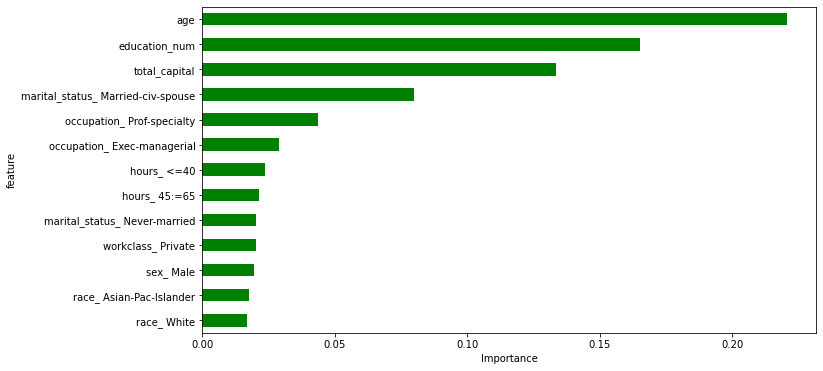

In [38]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')

Graph above shows the level of importance each variable gives in terms of describing *response variable* “revenue”.

It is obvious, that age and education are the most important ones.

Also, we can assume that being a Male will have positive impact on higher revenue than being a Female but I think that  it might be a bit biased conclusion from this model because of irregular distribution and a lot more frequent group of Males.

## **Conclusion:**

##### *After completion of this progect, I have built a model, that by using such characteristics of a person as: age, race, sex, work class, occupation, education, marital status, relationship, capital gain, capital loss, and working hours per week, can estimate with 86% accuracy does this particular person has income more than 50 000 per year or not (based on census data).*
